## Revisiting/Continuing our work on Pandas/Jupyter Notebooks
Week 10, March 2025</br>
ENGR 104

We begin by doing our usual imports

___
___

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We recall how to read a csv into a pandas date frame which we' call 'df'.

___
___

In [2]:
df = pd.read_csv('sensor_data.csv')
df

,Date,Location,Sensor_ID,Temperature_C,Humidity,PM2.5
0,2024-01-01,Location_A,Sensor_1,22.5,45,12.4
1,2024-01-01,Location_A,Sensor_2,21.8,47,10.2
2,2024-01-01,Location_B,Sensor_3,19.2,50,9.5
3,2024-01-02,Location_A,Sensor_1,23.1,43,11.7
4,2024-01-02,Location_A,Sensor_2,22.4,46,10.9
5,2024-01-02,Location_B,Sensor_3,20.5,48,8.6
6,2024-01-03,Location_A,Sensor_1,24.0,42,12.0
7,2024-01-03,Location_A,Sensor_2,23.2,44,11.1
8,2024-01-03,Location_B,Sensor_3,21.0,49,9.0
9,2024-01-04,Location_A,Sensor_1,24.5,40,13.0


In the following cells we set up a figure for 2 plots.</br>
We for each plot we pull the rows from our dataframe for "Location_A" and "Location_B" -- this is a slick way to filter.</br>
The last line shows how to save our plot to a jpeg at 300 dpi.
___
___

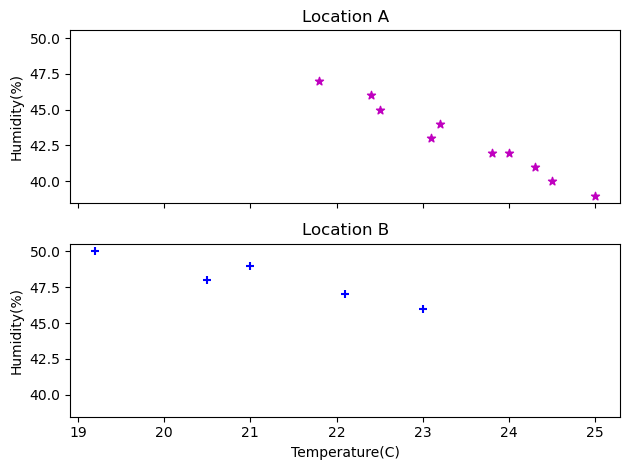

In [3]:
#set up the figure
fig, ax = plt.subplots(2,1, sharex= True, sharey = True)

#produce scatter plots
ax[0].scatter(df[df['Location'] == "Location_A"].Temperature_C, df[df['Location'] == "Location_A"].Humidity, color = 'm', marker = '*')
ax[1].scatter(df[df['Location'] == "Location_B"].Temperature_C, df[df['Location'] == "Location_B"].Humidity, color = 'b', marker = '+')

ax[1].set_xlabel('Temperature(C)')
ax[0].set_ylabel('Humidity(%)')
ax[1].set_ylabel('Humidity(%)')
ax[0].set_title('Location A')
ax[1].set_title('Location B')
fig.tight_layout()

fig.savefig('sensor_plot.jpeg', dpi = 300)

In the following code snippet, we set the date frame index to be given by the 'Date' column and then we make a humidity bar plot.
___
___

<Axes: xlabel='Date'>

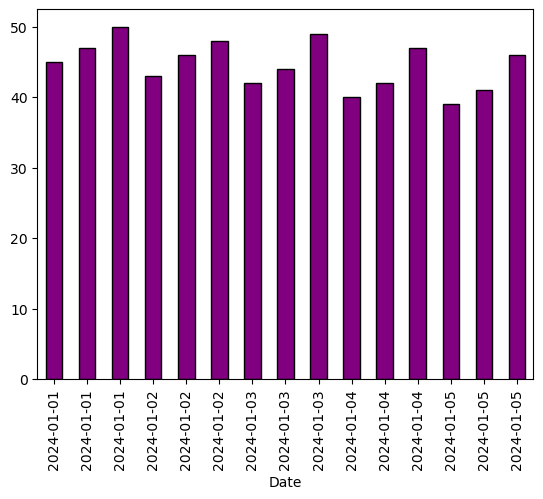

In [4]:
df = df.set_index('Date')
fig2, ax2 = plt.subplots()
df['Humidity'].plot.bar(color = 'purple', edgecolor = 'k')

Here we exhibit most of the basic markdown functionality.


# Header 1

Doing some stuff with fake sensor data!

## Header 2

Going to eventually show plots by location.

### Header 3

List of items
- Thing 1
- Thing 2

Writing a math equation in line $f(x) = 3x^2 +4x - 5$ using LaTeX versus centering it

$$ e^{i\pi}+1=0.$$

And then I can write stuff in **bold** and *italics* pretty easily. Finally, I might want to disply some Python code.

```python
def myFunction(a):
    if a > 0:
        print("Your rock!")
```


Last but not least you might want to display an image.
<center>
<img src = "sensor_plot.jpeg", width = 500>
</center>


Just an example of how to plot a 3D surface (importing cm allows us to use colormaps)
___
___

Text(0.5, 0, 'z-axis')

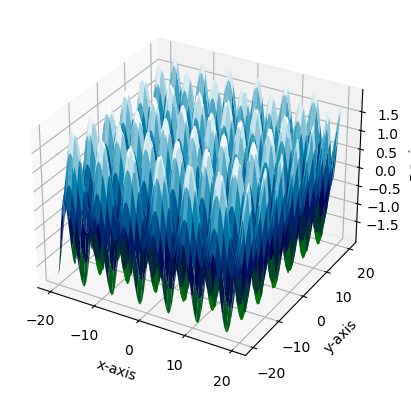

In [5]:
from matplotlib import cm

x = np.linspace(-20,20, 100)
y = np.linspace(-20,20, 100)
X, Y = np.meshgrid(x,y)
Z = np.sin(X) + np.sin(Y)

fig1, ax1 = plt.subplots(subplot_kw = {'projection': '3d'})
ax1.plot_surface(X, Y, Z, cmap = cm.ocean)
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')
ax1.set_zlabel('z-axis')


df.plot() will plot all columns of your dataframe with the index as the independent variable (data in our case) </br>
The rot=45 is to rotate the dates on the x-axis to fit better.

<Axes: xlabel='Date'>

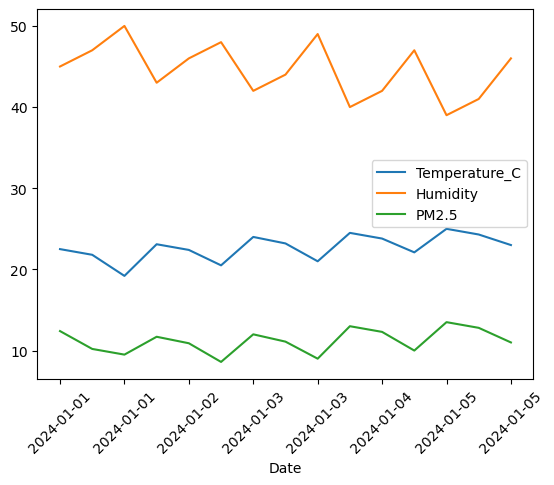

In [6]:
df.plot(rot = 45)

The lines that follow demonstrate some of built-in methods you can use for the columns of a dataframe. This is a **small** subset of everything you can do.
___
___

In [7]:
df['Humidity'].mean()

44.6

In [8]:
df['Humidity'].max()

50

In [9]:
df['Humidity'].sum()

669

In [10]:
df['Humidity'].std()

3.3551665915633544

In [11]:
df['Humidity'].describe()

count    15.000000
mean     44.600000
std       3.355167
min      39.000000
25%      42.000000
50%      45.000000
75%      47.000000
max      50.000000
Name: Humidity, dtype: float64

The following demonstrates how to sort a data frame by a particular column. Skip the keyword ascending argument and the sort will be ascending by default.

___
___

In [12]:
df.sort_values(ascending = False, by = 'Humidity')

,Location,Sensor_ID,Temperature_C,Humidity,PM2.5
Date,,,,,
2024-01-01,Location_B,Sensor_3,19.2,50,9.5
2024-01-03,Location_B,Sensor_3,21.0,49,9.0
2024-01-02,Location_B,Sensor_3,20.5,48,8.6
2024-01-01,Location_A,Sensor_2,21.8,47,10.2
2024-01-04,Location_B,Sensor_3,22.1,47,10.0
2024-01-02,Location_A,Sensor_2,22.4,46,10.9
2024-01-05,Location_B,Sensor_3,23.0,46,11.0
2024-01-01,Location_A,Sensor_1,22.5,45,12.4
2024-01-03,Location_A,Sensor_2,23.2,44,11.1


The followig two cells demonstrate a couple things:
- How create a new column for fahrenheit temp by doing some math on the celsius column
- Demonstrating how to use the 'loc' method to choose rows based on logic. We use '|' for 'or' and '&' for 'and'. The code returns all rows for Sensor_1 or Sencor_2 and the columns from Sensor_ID to PM2.5

In [13]:
df['Temperature_F'] = df['Temperature_C'] * 1.8 + 32

In [22]:
badDF = df.loc[(df.Sensor_ID == 'Sensor_1') | (df.Sensor_ID == 'Sensor_2'), 'Sensor_ID':'PM2.5']
print(badDF)

           Sensor_ID  Temperature_C  Humidity  PM2.5
Date                                                
2024-01-01  Sensor_1           22.5        45   12.4
2024-01-01  Sensor_2           21.8        47   10.2
2024-01-02  Sensor_1           23.1        43   11.7
2024-01-02  Sensor_2           22.4        46   10.9
2024-01-03  Sensor_1           24.0        42   12.0
2024-01-03  Sensor_2           23.2        44   11.1
2024-01-04  Sensor_1           24.5        40   13.0
2024-01-04  Sensor_2           23.8        42   12.3
2024-01-05  Sensor_1           25.0        39   13.5
2024-01-05  Sensor_2           24.3        41   12.8


The cells that follow show how to create a new data frame from scratch and then how to add a new row from data in dictionary format.

___
___

In [15]:
myDf = pd.DataFrame()
# Adding a column of names
myDf['Name'] = ['Alice', 'Bob', 'Charlie', 'David', 'Eva']

# Adding a column of ages
myDf['Age'] = [25, 30, 35, 40, 45]

# Adding a column of city
myDf['City'] = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']

myDf


,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston
4,Eva,45,Phoenix


In [16]:
new_row = {'Name': 'Frank', 'Age': 50, 'City': 'San Francisco'}
myDf = pd.concat([myDf,pd.DataFrame([new_row])], ignore_index = True)
myDf

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston
4,Eva,45,Phoenix
5,Frank,50,San Francisco


In [17]:
myDf.iloc[:3,:2] #remidner of how iloc method works

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


The following shows how to create a data frame from a dicionary in one fell swoop.

In [18]:

friends = {'Names':['Alice', 'Bob', 'Charlie'], 'Ages': [25,30,35]}
newDf = pd.DataFrame(friends)
newDf

,Names,Ages
0,Alice,25
1,Bob,30
2,Charlie,35
